#**Customer segmentation with clustering**

<br>

## Business context

The objective of this project was to develop robust customer segmentation for assisting an e-commerce company in understanding and serving its customers better. This will help it have a more customer-centric focus, improving marketing efficiency. The process involved exploring the data, employing preprocessing and feature engineering, dimensionality reduction, and performing customer segmentation with clustering models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #consider using plotly?
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

data = pd.read_csv('https://github.com/FourthRevGitHub/CAM_DS_Public-Data-Sets/raw/main/Course%201/Week%206/CUSTOMERS_CLEAN.zip')

print("Setup complete")

Setup complete


In [11]:
#view dataframe
display(data)
#get info about data
data.info()

,Quantity,City,Continent,Postal_Code,State_Province,Order_Date,Delivery_Date,Total Revenue,Unit Cost,Discount,OrderTypeLabel,CustomerCountryLabel,Customer_BirthDate,Customer_Group,Customer_Type,Order ID,Profit,Days to Delivery,Loyalty Num,Customer ID
0,3,Leinster,Oceania,6437,Western Australia,01JAN2012,07JAN2012,$28.50,$9.10,.,Internet Sale,Australia,08MAY1978,Internet/Catalog Customers,Internet/Catalog Customers,1230000033,$1.20,6,99,8818
1,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,$113.40,$56.90,.,Internet Sale,Australia,13DEC1978,Orion Club Gold members,Orion Club Gold members high activity,1230000204,($0.40),3,99,47793
2,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,$41.00,$18.50,.,Internet Sale,Australia,13DEC1978,Orion Club Gold members,Orion Club Gold members high activity,1230000204,$4.00,3,99,47793
3,1,Northbridge,Oceania,2063,New South Wales,01JAN2012,03JAN2012,$35.20,$29.60,.,Internet Sale,Australia,22JUN1997,Orion Club Gold members,Orion Club Gold members high activity,1230000268,$5.60,2,0,71727
4,1,Montréal,North America,NaN,Quebec,01JAN2012,04JAN2012,$24.70,$23.60,.,Internet Sale,Canada,28JAN1978,Orion Club Gold members,Orion Club Gold members medium activity,1230000487,$1.10,3,99,74503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951664,2,Kennewick,North America,99336,Washington,30DEC2016,30DEC2016,$89.00,$42.40,.,Retail Sale,United States,18JUL1993,Orion Club members,Orion Club members low activity,1244337625,$4.20,0,0,64221
951665,4,Kennewick,North America,99336,Washington,30DEC2016,30DEC2016,$93.60,$21.00,.,Retail Sale,United States,18JUL1993,Orion Club members,Orion Club members low activity,1244337625,$9.60,0,0,64221
951666,4,Belvidere,North America,07823,New Jersey,30DEC2016,01JAN2017,$114.40,$25.90,.,Internet Sale,United States,02FEB1997,Internet/Catalog Customers,Internet/Catalog Customers,1244337631,$10.80,2,0,64521
951667,1,Belvidere,North America,07823,New Jersey,30DEC2016,01JAN2017,$335.40,$327.30,.,Internet Sale,United States,02FEB1997,Internet/Catalog Customers,Internet/Catalog Customers,1244337631,$8.10,2,0,64521


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951669 entries, 0 to 951668
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Quantity              951669 non-null  int64 
 1   City                  951534 non-null  object
 2   Continent             951669 non-null  object
 3   Postal_Code           947953 non-null  object
 4   State_Province        834477 non-null  object
 5   Order_Date            951669 non-null  object
 6   Delivery_Date         951669 non-null  object
 7   Total Revenue         951669 non-null  object
 8   Unit Cost             951669 non-null  object
 9   Discount              951669 non-null  object
 10  OrderTypeLabel        951669 non-null  object
 11  CustomerCountryLabel  951669 non-null  object
 12  Customer_BirthDate    951669 non-null  object
 13  Customer_Group        951669 non-null  object
 14  Customer_Type         951669 non-null  object
 15  Order ID         

#EDA, Pre-processing and Feature engineering

In [12]:
#Checked for duplicates
duplicates = data[data.duplicated(keep=False)]
display(duplicates)

,Quantity,City,Continent,Postal_Code,State_Province,Order_Date,Delivery_Date,Total Revenue,Unit Cost,Discount,OrderTypeLabel,CustomerCountryLabel,Customer_BirthDate,Customer_Group,Customer_Type,Order ID,Profit,Days to Delivery,Loyalty Num,Customer ID
25808,1,Köln,Europe,51105,Nordrhein-Westfalen,08MAR2012,08MAR2012,$59.70,$59.90,.,Retail Sale,Germany,15MAR1958,Orion Club members,Orion Club members medium activity,1230368036,($0.20),0,99,29993
25809,1,Köln,Europe,51105,Nordrhein-Westfalen,08MAR2012,08MAR2012,$59.70,$59.90,.,Retail Sale,Germany,15MAR1958,Orion Club members,Orion Club members medium activity,1230368036,($0.20),0,99,29993
59722,2,Roma,Europe,00167,Lazio,24MAY2012,24MAY2012,$26.40,$11.90,.,Retail Sale,Italy,18SEP1993,Orion Club Gold members,Orion Club Gold members high activity,1230792924,$2.60,0,99,91394
59723,2,Roma,Europe,00167,Lazio,24MAY2012,24MAY2012,$26.40,$11.90,.,Retail Sale,Italy,18SEP1993,Orion Club Gold members,Orion Club Gold members high activity,1230792924,$2.60,0,99,91394
60474,1,Madrid,Europe,28042,"Madrid, Comunidad de",26MAY2012,29MAY2012,$55.10,$55.30,.,Catalog Sale,Spain,08MAR1968,Orion Club Gold members,Orion Club Gold members high activity,1230801908,($0.20),3,0,74401
60475,1,Madrid,Europe,28042,"Madrid, Comunidad de",26MAY2012,29MAY2012,$55.10,$55.30,.,Catalog Sale,Spain,08MAR1968,Orion Club Gold members,Orion Club Gold members high activity,1230801908,($0.20),3,0,74401
71115,2,Brooklyn,North America,11231,New York,17JUN2012,17JUN2012,$53.98,$20.46,.,Retail Sale,United States,17JUL1997,Orion Club members,Orion Club members low activity,1230923543,$13.06,0,99,6901
71116,2,Brooklyn,North America,11231,New York,17JUN2012,17JUN2012,$53.98,$20.46,.,Retail Sale,United States,17JUL1997,Orion Club members,Orion Club members low activity,1230923543,$13.06,0,99,6901
85385,2,Floral Park,North America,11001,New York,17JUL2012,17JUL2012,$85.60,$43.00,.,Retail Sale,United States,09AUG1958,Orion Club members,Orion Club members low activity,1231089144,($0.40),0,99,21840
85386,2,Floral Park,North America,11001,New York,17JUL2012,17JUL2012,$85.60,$43.00,.,Retail Sale,United States,09AUG1958,Orion Club members,Orion Club members low activity,1231089144,($0.40),0,99,21840


In [13]:
#Checked for missing values
data.isnull().sum()

,0
Quantity,0
City,135
Continent,0
Postal_Code,3716
State_Province,117192
Order_Date,0
Delivery_Date,0
Total Revenue,0
Unit Cost,0
Discount,0


In [14]:
#Removeed duplicates
dup_count=data.duplicated().sum()
data.drop_duplicates(inplace=True)
print("Removed {} duplicate rows".format(dup_count))
data.reset_index(drop=True, inplace=True)

Removed 21 duplicate rows


In [15]:
#Converted non-num columns for cost/profits to num
data["Total Revenue"]=pd.to_numeric(data["Total Revenue"].str.replace('[\$, ]','',regex=True))
data["Unit Cost"]=pd.to_numeric(data["Unit Cost"].str.replace('[\$, ]','',regex=True))
data["Profit"]=pd.to_numeric(data["Profit"].str.replace('[\$,\(\) ]','',regex=True))

#Converted the date columns to date type
data['Order_Date'] = pd.to_datetime(data['Order_Date'],format='%d%b%Y')
data['Delivery_Date'] = pd.to_datetime(data['Delivery_Date'],format='%d%b%Y')
data['Customer_BirthDate'] = pd.to_datetime(data['Customer_BirthDate'],format='%d%b%Y')


print("Completed successfully")

Completed successfully


In [16]:
##Feature engineering

#Defined today
today = pd.Timestamp("now")
#Calculate customer age & create new column
data['Customer_Age'] = (today - data['Customer_BirthDate']).dt.days // 365

#Create frequency feature
data['Frequency'] = data.groupby('Customer ID')['Order ID'].transform('count')

#Create recency feature
data['Recency'] = (today - data['Delivery_Date']).dt.days


print("Completed successfully")

Completed successfully


In [17]:
display(data)

,Quantity,City,Continent,Postal_Code,State_Province,Order_Date,Delivery_Date,Total Revenue,Unit Cost,Discount,...,Customer_Group,Customer_Type,Order ID,Profit,Days to Delivery,Loyalty Num,Customer ID,Customer_Age,Frequency,Recency
0,3,Leinster,Oceania,6437,Western Australia,2012-01-01,2012-01-07,28.50,9.1,.,...,Internet/Catalog Customers,Internet/Catalog Customers,1230000033,1.20,6,99,8818,47,31,5116
1,2,Berowra,Oceania,2081,New South Wales,2012-01-01,2012-01-04,113.40,56.9,.,...,Orion Club Gold members,Orion Club Gold members high activity,1230000204,0.40,3,99,47793,47,20,5119
2,2,Berowra,Oceania,2081,New South Wales,2012-01-01,2012-01-04,41.00,18.5,.,...,Orion Club Gold members,Orion Club Gold members high activity,1230000204,4.00,3,99,47793,47,20,5119
3,1,Northbridge,Oceania,2063,New South Wales,2012-01-01,2012-01-03,35.20,29.6,.,...,Orion Club Gold members,Orion Club Gold members high activity,1230000268,5.60,2,0,71727,28,20,5120
4,1,Montréal,North America,NaN,Quebec,2012-01-01,2012-01-04,24.70,23.6,.,...,Orion Club Gold members,Orion Club Gold members medium activity,1230000487,1.10,3,99,74503,47,6,5119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951643,2,Kennewick,North America,99336,Washington,2016-12-30,2016-12-30,89.00,42.4,.,...,Orion Club members,Orion Club members low activity,1244337625,4.20,0,0,64221,32,13,3297
951644,4,Kennewick,North America,99336,Washington,2016-12-30,2016-12-30,93.60,21.0,.,...,Orion Club members,Orion Club members low activity,1244337625,9.60,0,0,64221,32,13,3297
951645,4,Belvidere,North America,07823,New Jersey,2016-12-30,2017-01-01,114.40,25.9,.,...,Internet/Catalog Customers,Internet/Catalog Customers,1244337631,10.80,2,0,64521,28,7,3295
951646,1,Belvidere,North America,07823,New Jersey,2016-12-30,2017-01-01,335.40,327.3,.,...,Internet/Catalog Customers,Internet/Catalog Customers,1244337631,8.10,2,0,64521,28,7,3295


In [18]:
#Group data per customer ID
data_grouped = data.groupby('Customer ID').agg({
    'Quantity': 'sum',
    'City': 'first',
    'Continent': 'first',
    'State_Province': 'first',
    'Order_Date': 'last',
    'Delivery_Date': 'last',
    'Total Revenue': 'sum',
    'Unit Cost': 'mean',
    'Profit': 'sum',
    'Customer_Group': 'first',
    'Loyalty Num': 'first',
    'Customer_Age': 'first',
    'Frequency': 'first',
    'Recency': 'min'
}).reset_index()


#add CLV column >> copy or rename the Total revenue col
data_grouped['CLV'] = data_grouped['Total Revenue']

#add the Average unit cost column == Unit cost
data_grouped['Average_Unit_Cost'] = data_grouped['Unit Cost']

print("Completed successfully")

#View output
display(data_grouped)

Completed successfully


,Customer ID,Quantity,City,Continent,State_Province,Order_Date,Delivery_Date,Total Revenue,Unit Cost,Profit,Customer_Group,Loyalty Num,Customer_Age,Frequency,Recency,CLV,Average_Unit_Cost
0,1,51,Paris,Europe,Ile-de-France,2016-12-13,2016-12-13,4322.70,89.622857,546.90,Orion Club Gold members,0,72,35,3314,4322.70,89.622857
1,3,28,Bologna,Europe,Emilia-Romagna,2016-08-28,2016-09-02,2821.00,90.505000,267.30,Orion Club members,99,42,20,3416,2821.00,90.505000
2,4,17,Denver,North America,Colorado,2013-12-18,2013-12-18,782.67,37.195556,111.29,Orion Club members,0,42,9,4405,782.67,37.195556
3,5,29,South Gate,North America,California,2016-12-25,2016-12-25,2810.98,107.947368,236.88,Orion Club Gold members,99,37,19,3302,2810.98,107.947368
4,6,26,Genk,Europe,None,2016-06-21,2016-06-23,1604.58,52.526667,205.42,Orion Club members,99,67,15,3487,1604.58,52.526667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68295,94248,13,Corbeil Essonnes,Europe,Ile-de-France,2014-12-06,2014-12-07,982.47,93.250000,197.63,Internet/Catalog Customers,99,42,6,4051,982.47,93.250000
68296,94250,8,Vancouver,North America,British Columbia,2014-06-24,2014-06-25,927.78,115.075000,164.38,Internet/Catalog Customers,0,28,4,4216,927.78,115.075000
68297,94252,92,Le Mans,Europe,Pays de la Loire,2016-11-11,2016-11-13,9311.27,77.312245,835.41,Orion Club members,0,52,49,3344,9311.27,77.312245
68298,94253,14,Madrid,Europe,"Madrid, Comunidad de",2016-01-18,2016-01-22,1453.20,74.000000,213.10,Internet/Catalog Customers,0,58,8,3640,1453.20,74.000000


In [19]:
#seperated final pre-processed data
data_prp = data_grouped.set_index('Customer ID').iloc[:, -5:]
data_prp.head()
data_prp.shape

(68300, 5)

In [20]:
#checked for duplicates & missing values
print("Duplicates:",data_prp.duplicated().sum())
print('Missing values:')
data_prp.isnull().sum()

Duplicates: 0
Missing values:


,0
Customer_Age,0
Frequency,0
Recency,0
CLV,0
Average_Unit_Cost,0


In [21]:
data_prp.describe().round(decimals=2)

,Customer_Age,Frequency,Recency,CLV,Average_Unit_Cost
count,68300.00,68300.00,68300.00,68300.00,68300.00
mean,52.17,13.93,3663.40,1950.15,78.90
std,17.49,11.33,414.29,1719.92,38.01
min,28.00,1.00,3277.00,0.63,0.50
25%,37.00,6.00,3341.00,696.00,57.58
50%,52.00,11.00,3485.00,1497.40,73.45
75%,67.00,19.00,3835.00,2709.84,92.52
max,83.00,121.00,5121.00,18860.96,1463.50


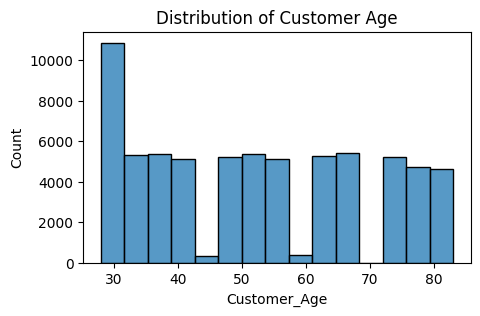

In [13]:
#Visualised customer age in a hist plot in groups of 10 range
plt.figure(figsize=(5,3))
sns.histplot(data_prp['Customer_Age'], bins=15)
plt.title('Distribution of Customer Age')
plt.show()

<Figure size 500x500 with 0 Axes>

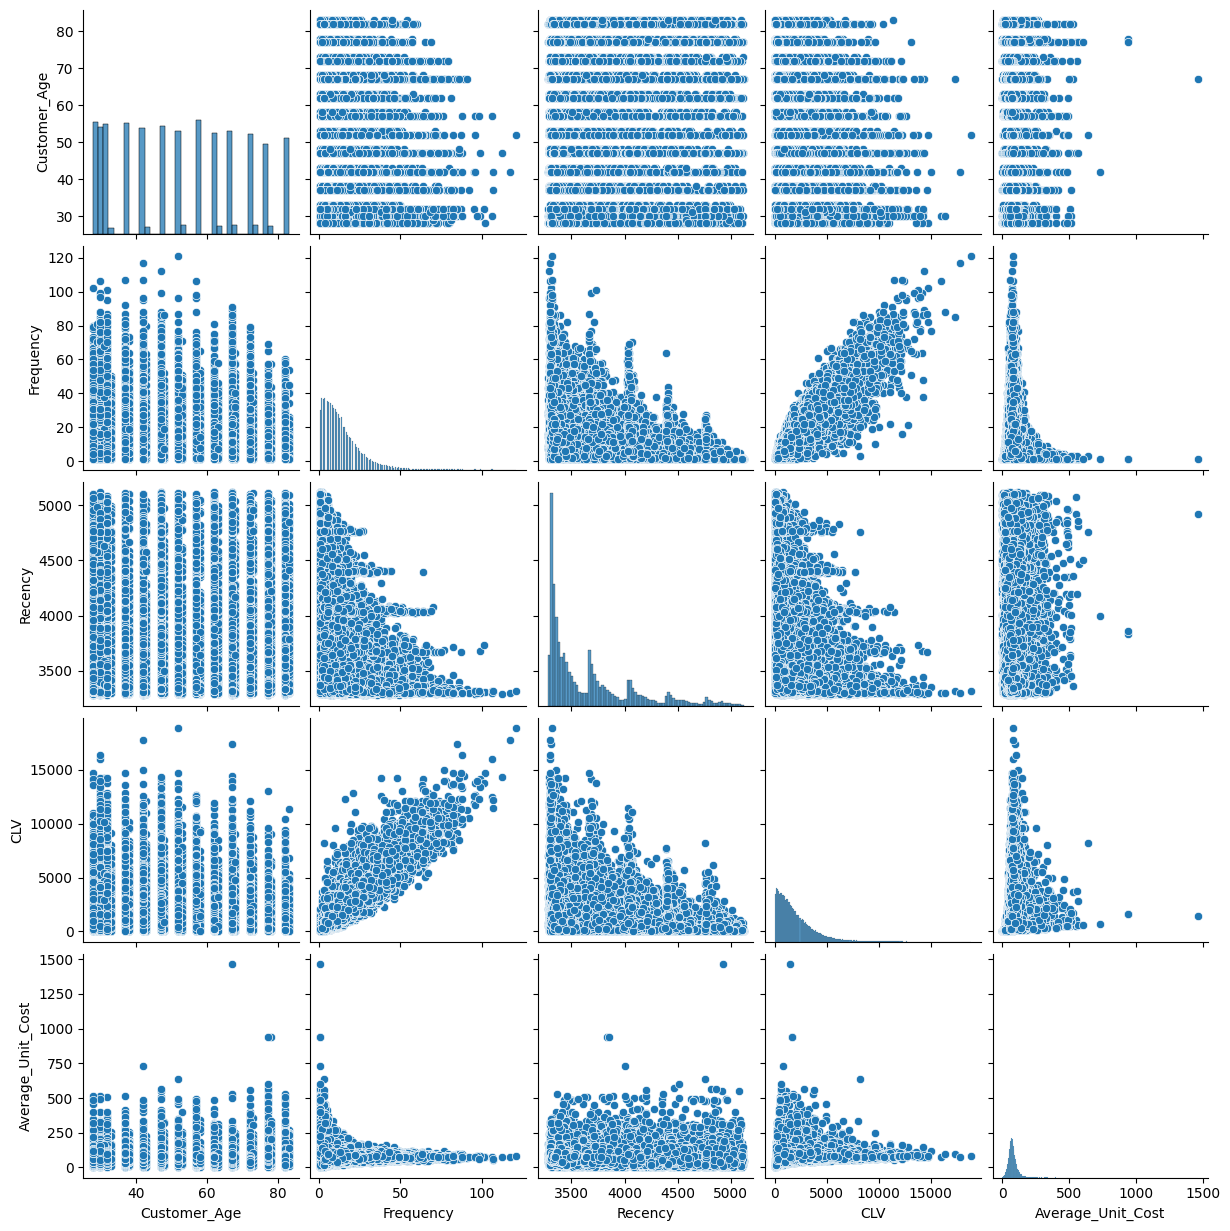

In [14]:
#Explored the relationship between variables
plt.figure(figsize=(5,5))
sns.pairplot(data_prp)
plt.show()

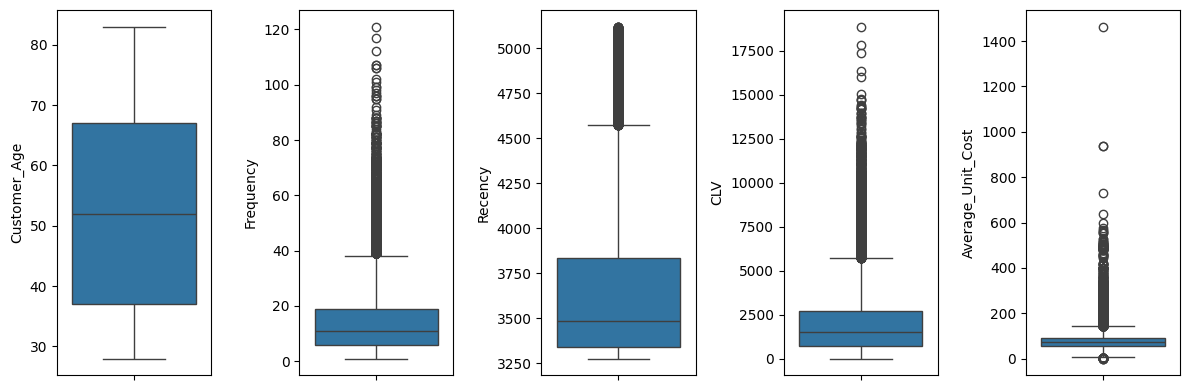

In [15]:
#Explored the distribution of the features
plt.figure(figsize=(12,4))

plt.subplot(1,5,1)
sns.boxplot(data_prp['Customer_Age'])
#plt.title('Customer Age')

plt.subplot(1,5,2)
sns.boxplot(data_prp['Frequency'])
#plt.title('Frequency')

plt.subplot(1,5,3)
sns.boxplot(data_prp['Recency'])
#plt.title('Recency')

plt.subplot(1,5,4)
sns.boxplot(data_prp['CLV'])
#plt.title('CLV')

plt.subplot(1,5,5)
sns.boxplot(data_prp['Average_Unit_Cost'])
#plt.title('Average Unit Cost')

plt.tight_layout()
plt.show()

##Identify Ouliers

In [16]:
#Created a custom function to apply the IQR method for identifying outliers
def find_outliers(df):
  """This function loops over the columns to calculate the IQR, lower/upper ranges,
    and creates the new columns that contain binary values
    which indicate the observations that lie beyond the Upper and lower IQR ranges"""
  df_clean = df.copy()
  for col in df_clean.columns:
    q1 = df_clean[col].quantile(0.25)
    q3 = df_clean[col].quantile(0.75)
    iqr = q3-q1
    lower_limit = q1-1.5*iqr
    upper_limit = q3+1.5*iqr
    #Created & populated a new dataframe with the normal values
    df_clean = df_clean[(df_clean[col] <= upper_limit)&(df_clean[col] >= lower_limit)]
  return df_clean

data_clean = find_outliers(data_prp)

In [17]:
display(data_clean)

,Customer_Age,Frequency,Recency,CLV,Average_Unit_Cost
Customer ID,,,,,
1,72,35,3313,4322.70,89.622857
3,42,20,3415,2821.00,90.505000
4,42,9,4404,782.67,37.195556
5,37,19,3301,2810.98,107.947368
6,67,15,3486,1604.58,52.526667
...,...,...,...,...,...
94247,42,13,3363,3357.60,114.361538
94248,42,6,4050,982.47,93.250000
94250,28,4,4215,927.78,115.075000


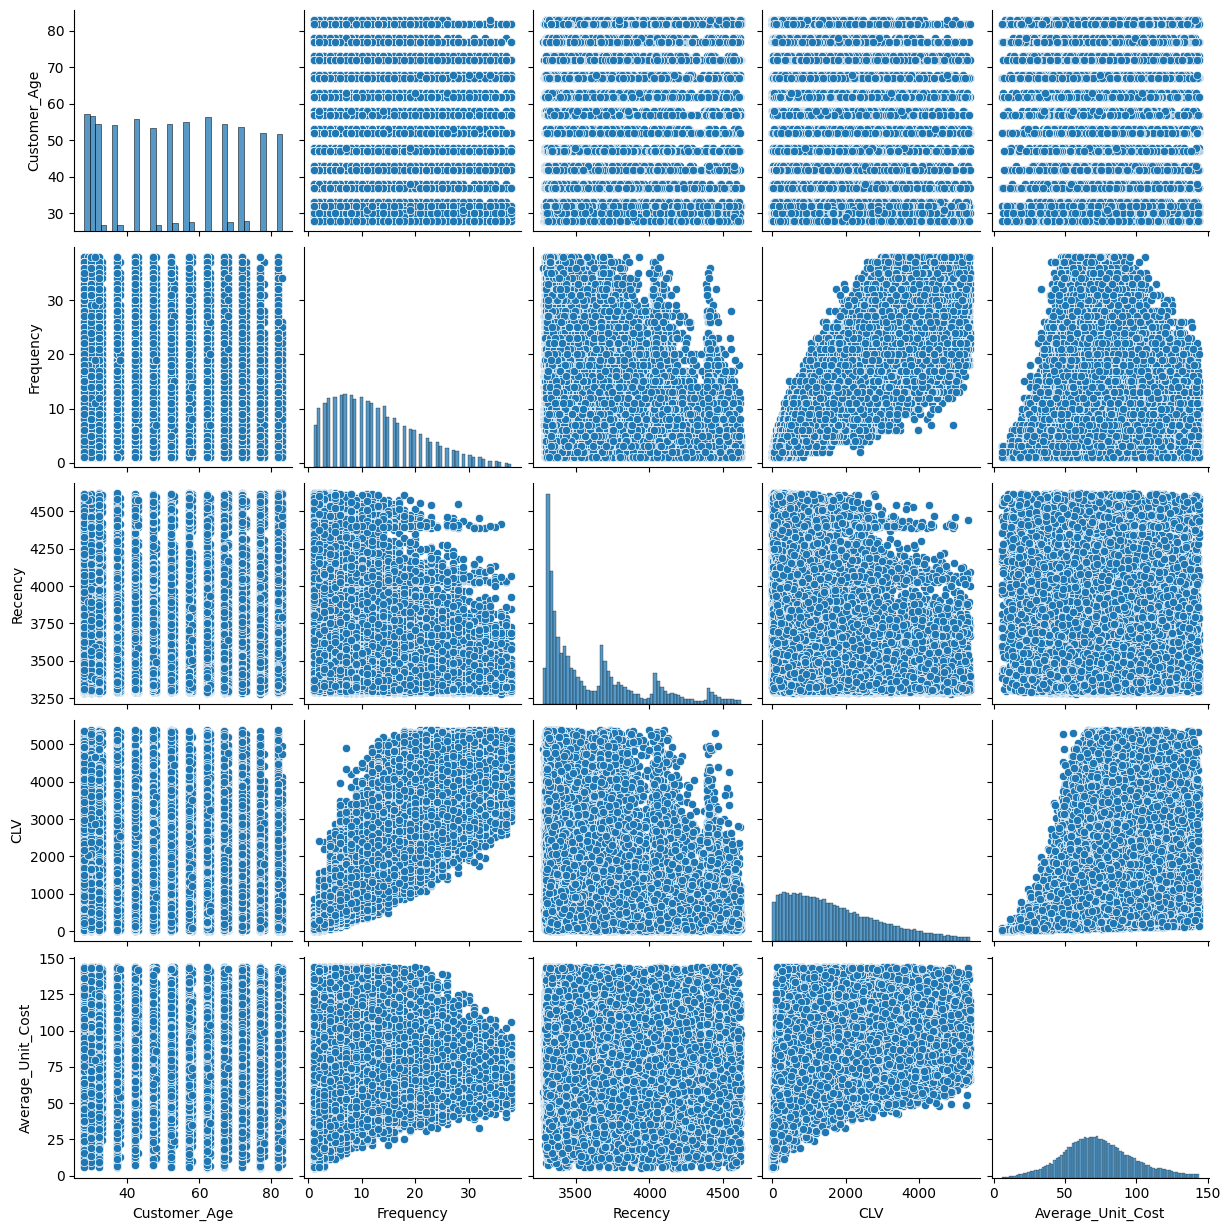

In [18]:
#Explored the clean data (no outliers)
sns.pairplot(data_clean)

##Scale the data

After examining the data, I saw that it is mostly right-skewed with the presence of outliers. Applying IQR I isolated around 15% of the data as outliers. This proves to be a concern as the loss of information from this data could cause inncomplete representation of the customer groups. Therefore, I decided to keep the outliers and scale the data using the RobustScaler to reduce their impact in the upcoming clustering.


In [ ]:
#Standardised data with robust scaler
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
data_robust = robust_scaler.fit_transform(data_prp)

data_robust = pd.DataFrame(data_robust,columns=data_prp.columns)
data_robust.shape
data_robust.head()

,Customer_Age,Frequency,Recency,CLV,Average_Unit_Cost
0,0.666667,1.846154,-0.346154,1.402938,0.462935
1,-0.333333,0.692308,-0.139676,0.657250,0.488186
2,-0.333333,-0.153846,1.862348,-0.354908,-1.037755
3,-0.500000,0.615385,-0.370445,0.652275,0.987460
4,0.500000,0.307692,0.004049,0.053222,-0.598914


#Clustering

##Determining number of Clusters

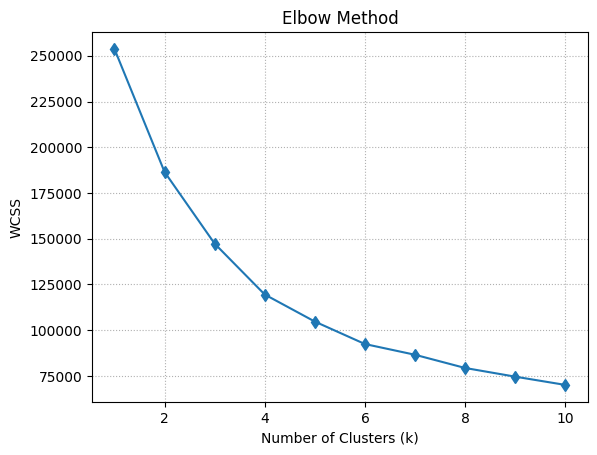

In [20]:
#Applied elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 11):  #Testing for k values from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_robust)
    wcss.append(kmeans.inertia_)  #Inertia/WCSS

#Plotting the elbow curve
plt.plot(range(1, 11), wcss, marker='d', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(linestyle='dotted')
plt.show()

Based on the graph, the slope of the curve levels off at a WCSS score of about 90000, based on which, the optimal number of clusters will be either 5 or 6. Further analysis using silhouette score will be carried out below.

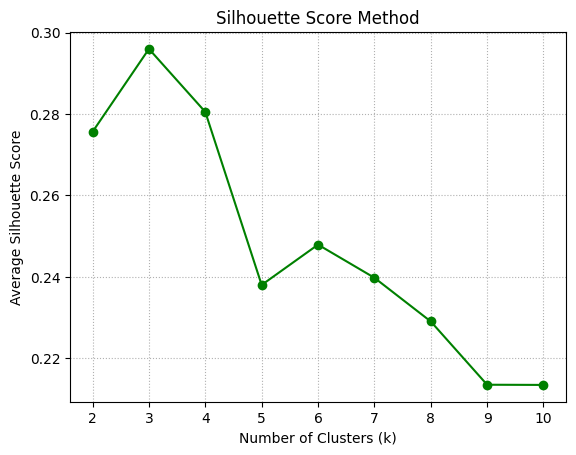

In [21]:
#Applied silhouette score to determine numbers of Ks

silhouette_scores = []
for i in range(2, 11):  #Trying k values from 2 to 10 (Silhouette Score needs at least 2 clusters)
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(data_robust)
    silhouette_scores.append(silhouette_score(data_robust, cluster_labels))

#Plotting the Silhouette Scores
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='g')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.grid(linestyle='dotted')
plt.show()

For n_clusters = 4 The average silhouette_score is : 0.280490611218827
For n_clusters = 5 The average silhouette_score is : 0.23917666935343496
For n_clusters = 6 The average silhouette_score is : 0.24791738440302613


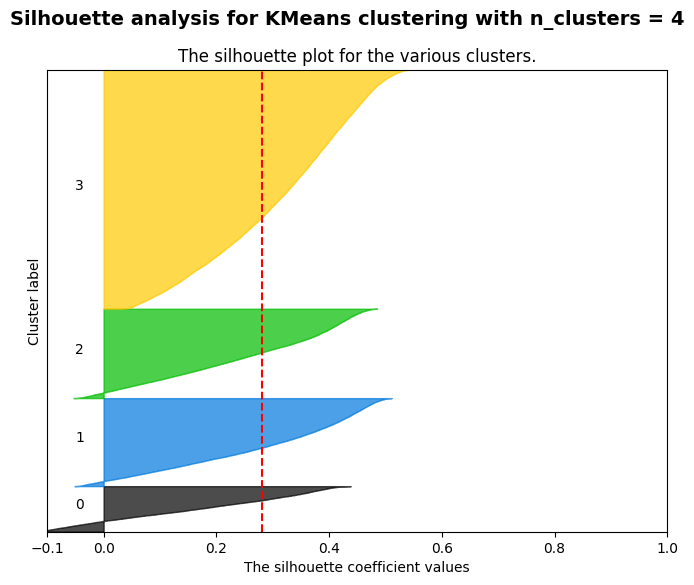

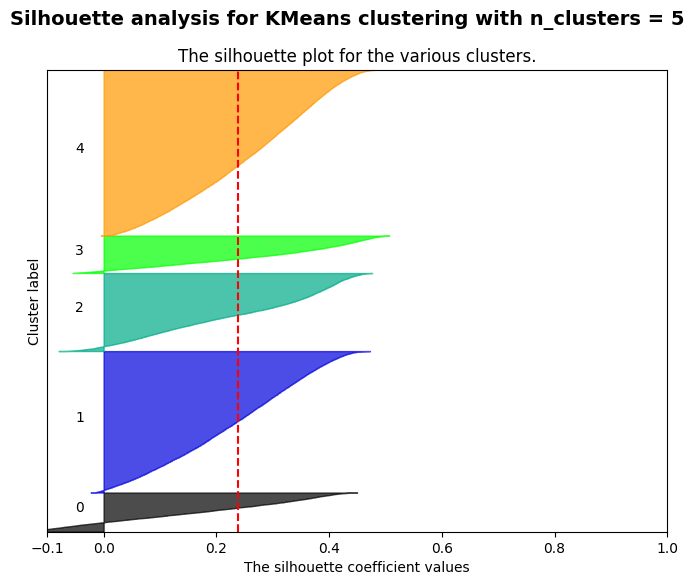

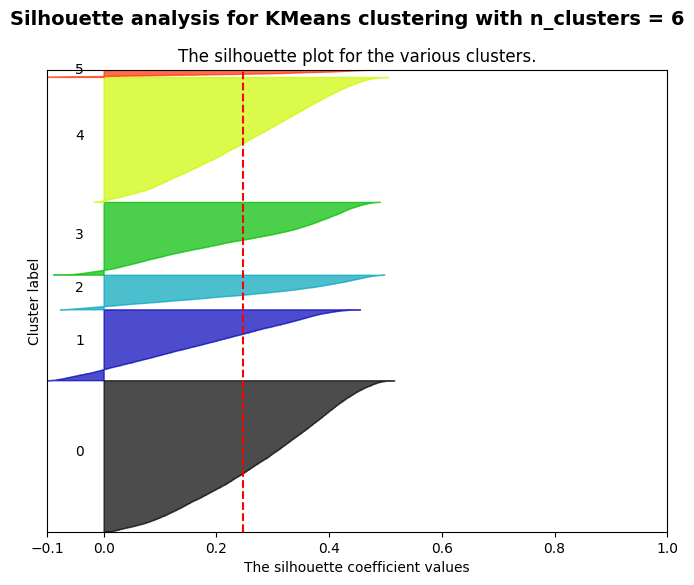

In [34]:
import matplotlib.cm as cm

range_n_clusters = [4, 5, 6]  # Specifying the range of clusters to analyse

for n_clusters in range_n_clusters:
    # Create a subplot for the silhouette plot
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8,6)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_robust) + (n_clusters + 1) * 10])

    # Initialise the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
    cluster_labels = clusterer.fit_predict(data_robust)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(data_robust, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_robust, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

The silhouette score for 6 clusters shows a value (sh = 0.248) slightly greater than that for 5 (sh = 0.2391), suggesting improved granurality of clusters. This is in alignment with the observations from the elbow method.

In [35]:
data_robust.head()

,Customer_Age,Frequency,Recency,CLV,Average_Unit_Cost
0,0.666667,1.846154,-0.346154,1.402938,0.462935
1,-0.333333,0.692308,-0.139676,0.657250,0.488186
2,-0.333333,-0.153846,1.862348,-0.354908,-1.037755
3,-0.500000,0.615385,-0.370445,0.652275,0.987460
4,0.500000,0.307692,0.004049,0.053222,-0.598914


##Dendrogram generation & Clustering (Agglomerative & K-means)

In [32]:
#Selected a sample to prevent notebook crash for Agglomerative clustering
sample_data = data_robust.sample(n=22800, random_state=42)

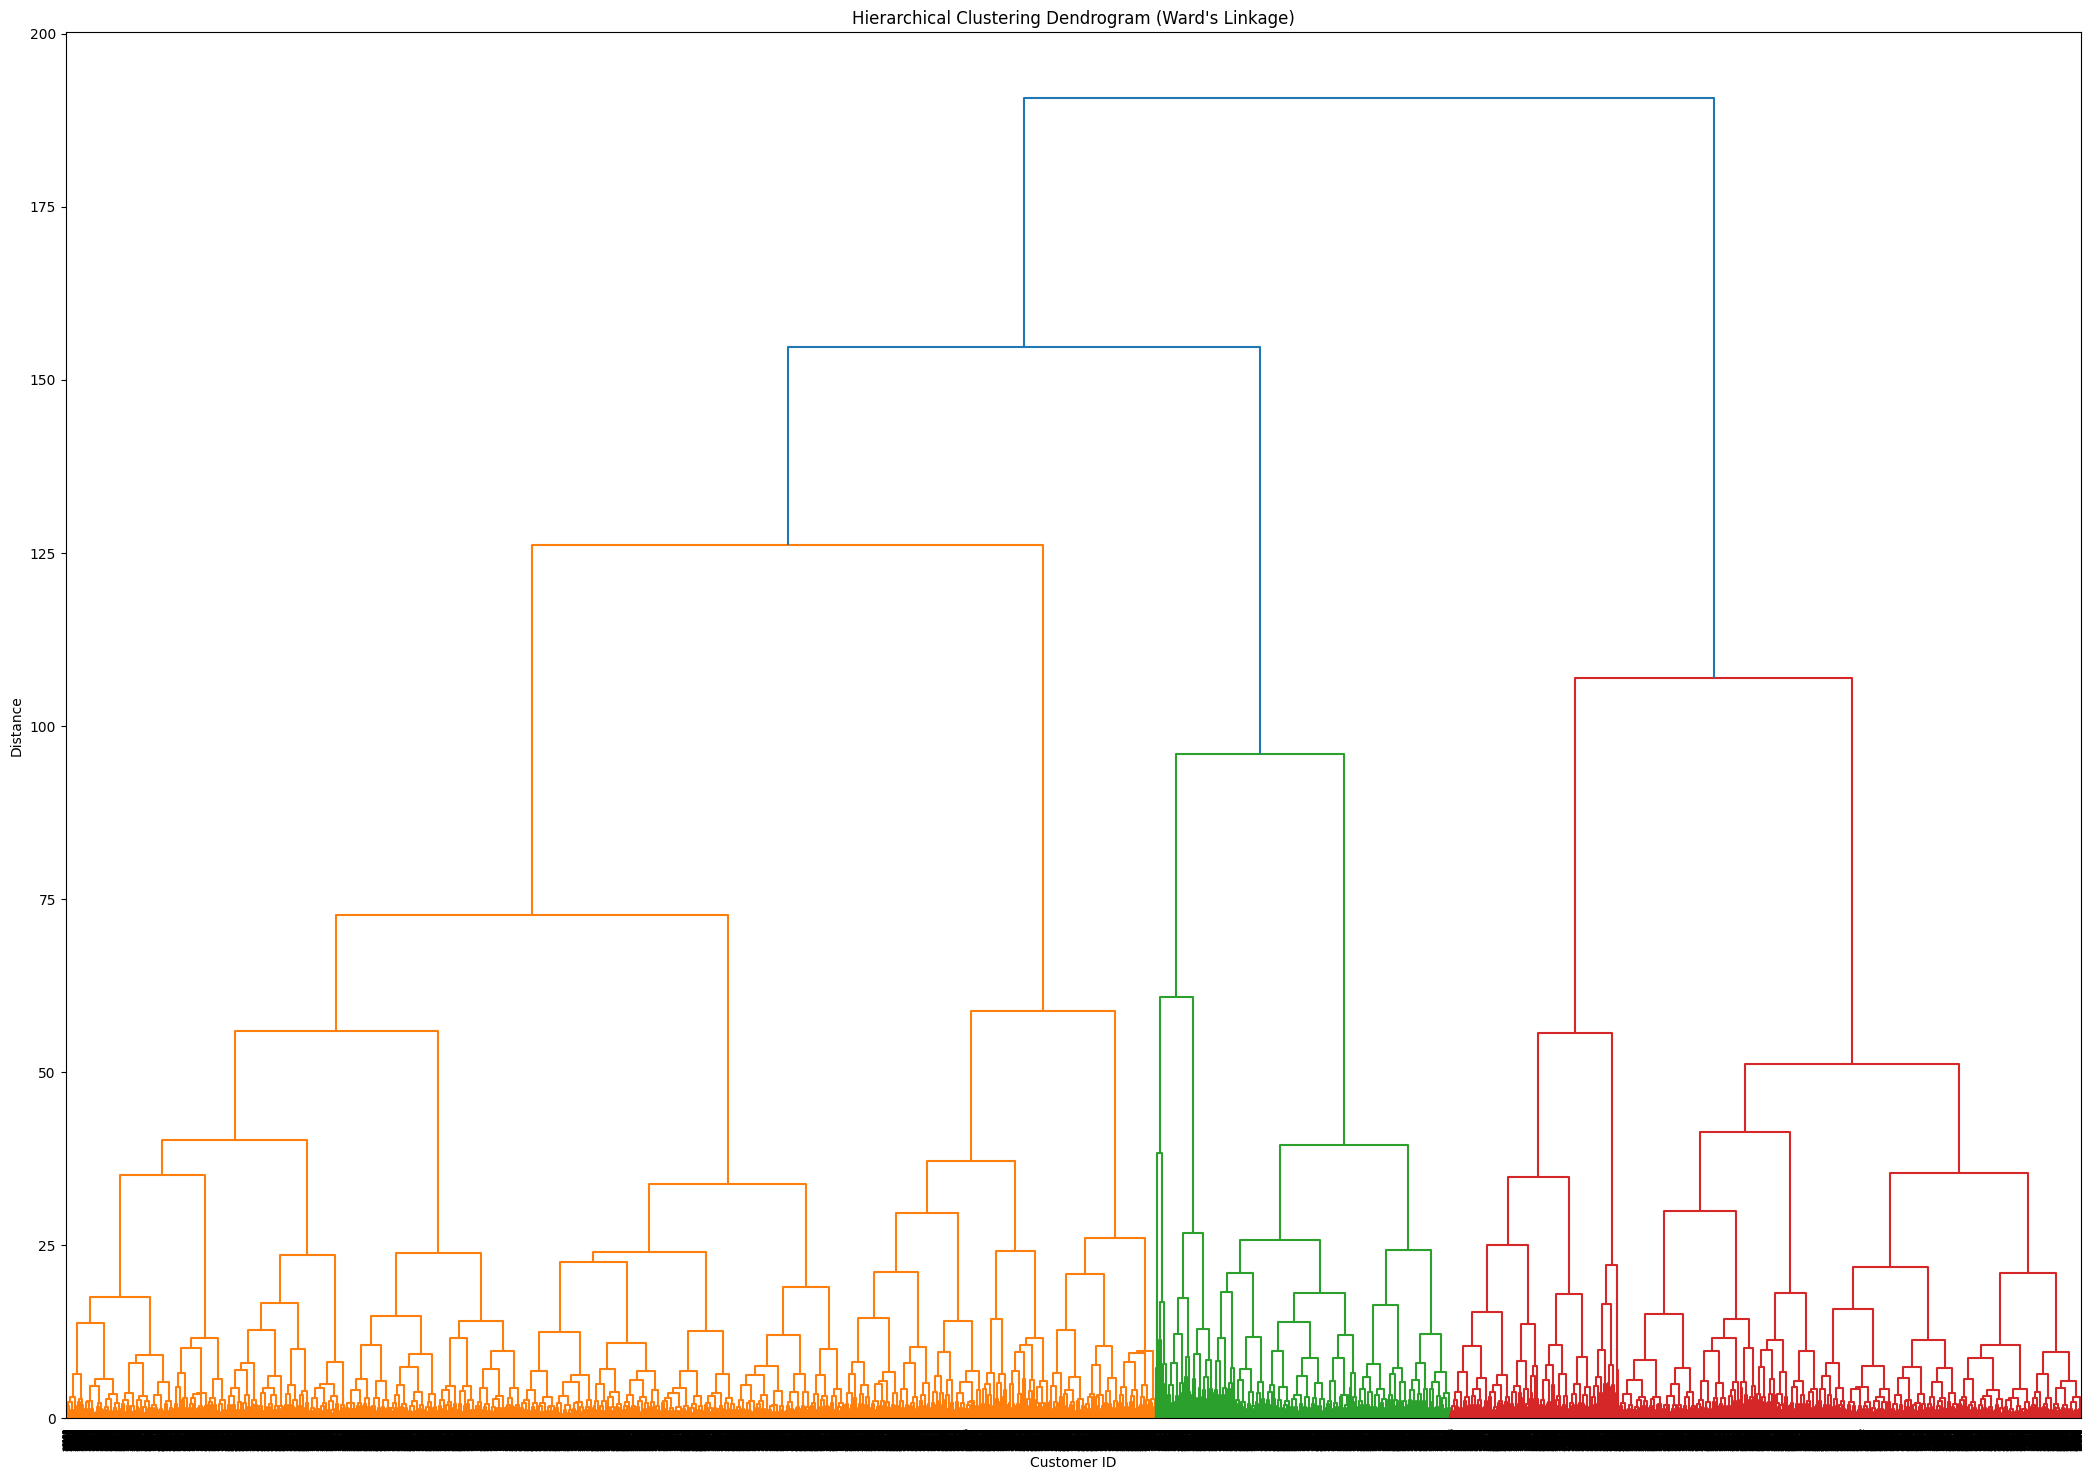

In [33]:
#Created a Dendrogram (Hierarchical clustering) MAIN
### tried average/complete(not great) ------ ward(best)
from scipy.cluster.hierarchy import dendrogram, linkage

#Select a sample to prevent notebook crash
sample_data = data_robust.sample(n=22800, random_state=42)

#Create linkage Matrix
linkage_matrix = linkage(sample_data, method='ward')

#plotting the dendrogram
plt.figure(figsize=(26, 18))
dendrogram(linkage_matrix,p=100,orientation="top", distance_sort='descending', show_leaf_counts=True)  #, orientation="top", distance_sort='descending', show_leaf_counts=True, color_threshold=2
plt.title('Hierarchical Clustering Dendrogram (Ward\'s Linkage)')
plt.xlabel('Customer ID')
plt.ylabel('Distance')
plt.show()

The dendrogram was analysed to identify a natural separation in the hierarchical structure. A cutoff line was placed at a linkage distance of 80 representing the point at which cluster merges begin to involve substantially dissimilar groups. This cutoff yields a manageable number of clusters that are both internally coherent and externally distinct. This choice balances statistical separation with interpretability, avoiding both under-clustering and over-fragmentation.

In [38]:
#Created a dataframe for outputs
customer_clusters = data_robust.copy()
customer_clusters.head()

,Customer_Age,Frequency,Recency,CLV,Average_Unit_Cost
0,0.666667,1.846154,-0.346154,1.402938,0.462935
1,-0.333333,0.692308,-0.139676,0.657250,0.488186
2,-0.333333,-0.153846,1.862348,-0.354908,-1.037755
3,-0.500000,0.615385,-0.370445,0.652275,0.987460
4,0.500000,0.307692,0.004049,0.053222,-0.598914


In [36]:
#Performed agglomerative clustering (Sampled data as for dendrogram)
agglomerate = AgglomerativeClustering(metric='euclidean', linkage='ward', n_clusters=6)
sample_data['Agglomerative_Clusters'] = agglomerate.fit_predict(sample_data)

In [37]:
sample_data.head()

,Customer_Age,Frequency,Recency,CLV,Average_Unit_Cost,Agglomerative_Clusters
63017,1.000000,-0.769231,0.878543,-0.631131,0.988966,3
11293,-0.666667,0.076923,2.151822,-0.158463,-0.704155,3
45293,0.333333,0.615385,-0.358300,0.671005,0.026741,4
7538,0.833333,-0.230769,-0.348178,-0.439656,-0.374261,0
47237,-0.666667,1.230769,-0.309717,1.283565,0.138403,2


In [39]:
#Applied KMeans clustering with the optimal number of clusters.
kmeans_clustering = KMeans(n_clusters=6,n_init=13,random_state=42)
customer_clusters['KMeans_Clusters'] = kmeans_clustering.fit_predict(data_robust)

In [40]:
customer_clusters.head()

,Customer_Age,Frequency,Recency,CLV,Average_Unit_Cost,KMeans_Clusters
0,0.666667,1.846154,-0.346154,1.402938,0.462935,4
1,-0.333333,0.692308,-0.139676,0.657250,0.488186,0
2,-0.333333,-0.153846,1.862348,-0.354908,-1.037755,1
3,-0.500000,0.615385,-0.370445,0.652275,0.987460,0
4,0.500000,0.307692,0.004049,0.053222,-0.598914,2


In [41]:
#Created a dataframe containing customer ID and cluster number
customer_clusters = customer_clusters.set_index(data_grouped['Customer ID'])
customer_clusters['KMeans_Clusters'].head()

,KMeans_Clusters
Customer ID,
1,4
3,0
4,1
5,0
6,2


#Visualisation with PCA and TSNE

In [9]:
import warnings
warnings.filterwarnings('ignore')

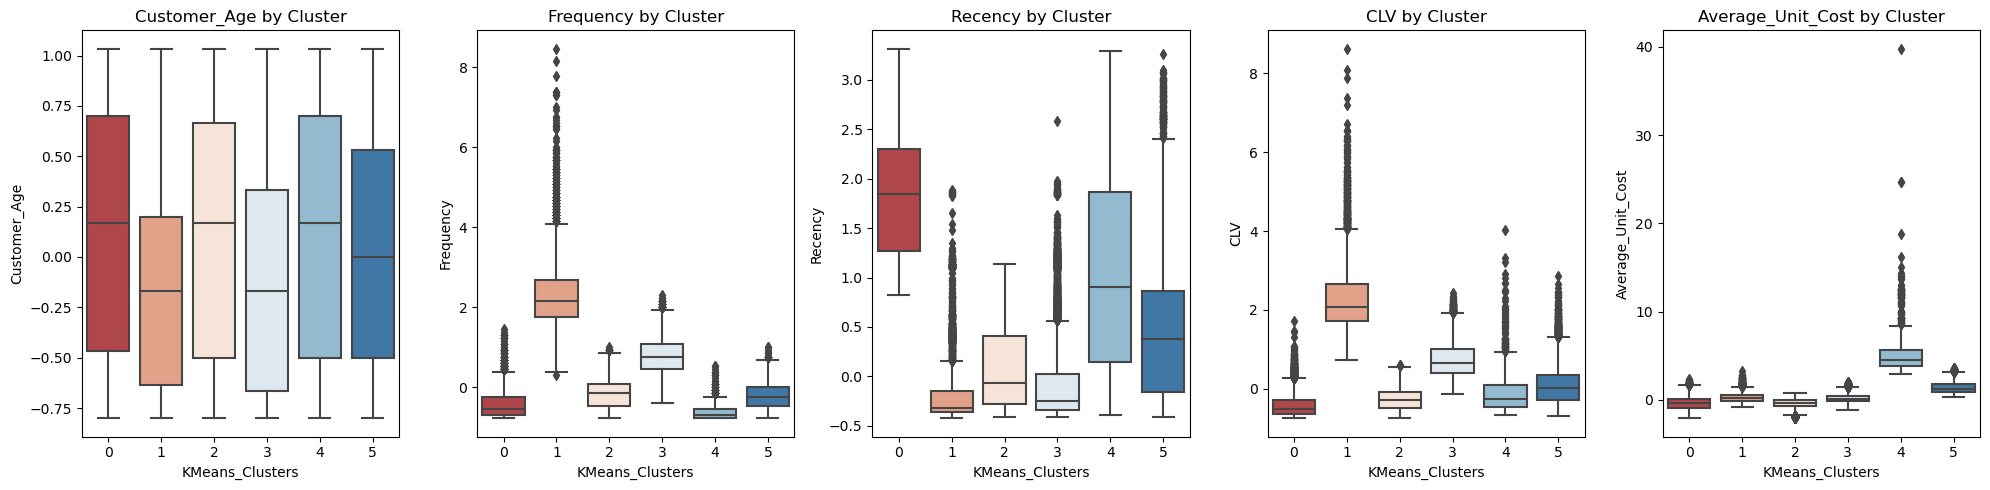

In [ ]:
#Plot clusters with relation to the 5 features - Scaled data

# List of metrics to plot
metrics = ['Customer_Age', 'Frequency', 'Recency', 'CLV', 'Average_Unit_Cost']

# Create subplots
fig, axes = plt.subplots(1, len(metrics), figsize=(20, 5))  # Adjust figsize as needed

# Loop through metrics and create boxplots
for i, metric in enumerate(metrics):
    sns.boxplot(x=customer_clusters['KMeans_Clusters'], y=metric, data=data_robust, ax=axes[i], palette='RdBu') #or Hierarchy_Clusters column
    axes[i].set_title(f'{metric} by Cluster')                   # data_prp for unscaled values | customer_clusters for scaled

plt.tight_layout()
plt.show()

##**Interpretations & business strategy:**


**Cluster 0:** High recency scores, low purchase frequency, low customer value and wide age range would suggest these are inactive or churn-risk customers with little engagement and low monetary value.
- **strategy**: Run a re-engagment campaign or minimise spending costs if ineffective.

**Cluster 1:** Highest CLV and Frequency values and lowest recency indicate these are most likely the core customers of the business.
- **strategy**: Key approach would be utilising retention, loyalty programmes, VIP perks and complementary product offerings.

**Cluster 2:** Recently active, cost sensitive consumers with medium to low engagement.
- **strategy**: Devise promotions or bundle deals to nurture towards higher frequency or larger basket size.

**Cluster 3:** Categorises reliable, moderately active customers with good balance of frequency and value.
- **strategy**: Target this segment with upsell and habit-building strategies.

**Cluster 4:** Is characterised by buyers who make large value purchases infrequently.
- **strategy**: Introduce premium campaigns and personalised reminders to improve frequency.

**Cluster 5:** Is defined by the 2nd largest AUC, and the 3rd highest CLV. Despite lower frequency of engagement, the recency of purchases is an indicator of growth potential.
- **strategy**: Stimulate repeat purchases and introduce onboarding benefits.

### PCA and TSNE on K-means Clustering


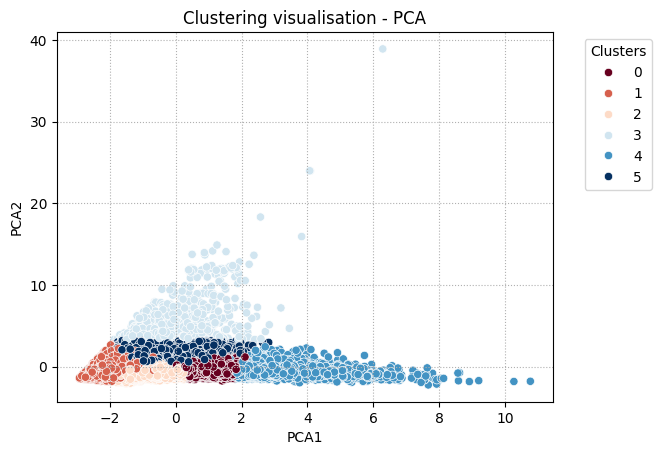

In [46]:
#Performed PCA on K-means clustering
from sklearn.decomposition import PCA

pca_reduce = PCA(n_components=2)
customer_clusters[['PCA1', 'PCA2']] = pca_reduce.fit_transform(data_robust)

#Plot the data
plt.title('Clustering visualisation - PCA')
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Clusters', data=customer_clusters, palette='RdBu') #palette='RdBu'
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Clusters')  #Outside the plot
plt.grid(linestyle='dotted')
plt.show()

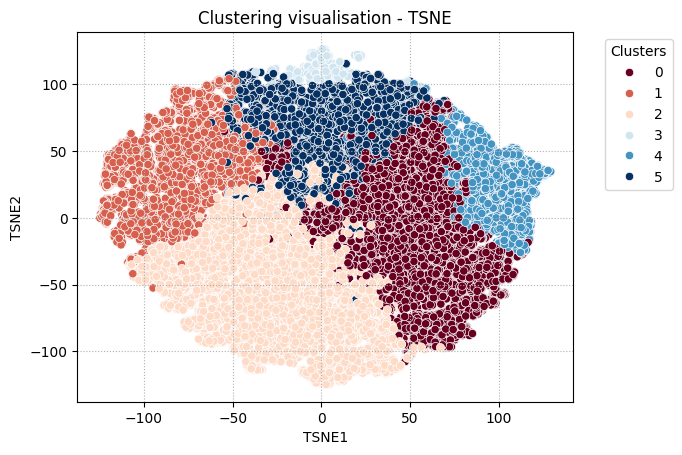

In [47]:
#Performed TSNE on K-means clustering
from sklearn.manifold import TSNE

tsne_reduce = TSNE(n_components=2,perplexity=15)
customer_clusters[['TSNE1','TSNE2']] = tsne_reduce.fit_transform(data_robust)

#Visualised the data
plt.title('Clustering visualisation - TSNE')
sns.scatterplot(x='TSNE1', y='TSNE2', hue='KMeans_Clusters', data=customer_clusters, palette='RdBu')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Clusters')  #Outside the plot
plt.grid(linestyle='dotted')
plt.show()

In [48]:
# Show KMeans Clustering table
display(customer_clusters)

,Customer_Age,Frequency,Recency,CLV,Average_Unit_Cost,KMeans_Clusters,PCA1,PCA2,TSNE1,TSNE2
Customer ID,,,,,,,,,,
1,0.666667,1.846154,-0.346154,1.402938,0.462935,4,2.042639,-0.148427,77.557007,5.271587
3,-0.333333,0.692308,-0.139676,0.657250,0.488186,0,0.863505,0.136980,50.419758,33.465923
4,-0.333333,-0.153846,1.862348,-0.354908,-1.037755,1,-1.413266,-0.835208,-86.563454,27.183270
5,-0.500000,0.615385,-0.370445,0.652275,0.987460,0,1.021267,0.595551,44.677452,50.807312
6,0.500000,0.307692,0.004049,0.053222,-0.598914,2,-0.115599,-0.794306,5.101008,-45.336365
...,...,...,...,...,...,...,...,...,...,...
94248,-0.333333,-0.384615,1.145749,-0.255695,0.566759,5,-0.882029,0.645980,-41.147667,61.614010
94250,-0.800000,-0.538462,1.479757,-0.282852,1.191483,5,-0.957237,1.327581,-36.278004,79.994537
94252,0.000000,2.923077,-0.285425,3.880075,0.110554,4,4.249895,-0.727186,112.847664,40.566414


### PCA and TSNE on Agglomerative Clustering

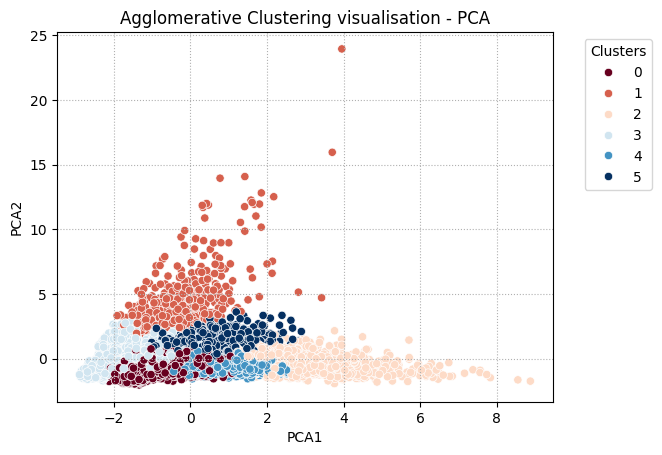

In [49]:
#Performed PCA on Agglomerative Clustering

sample_data[['PCA1', 'PCA2']] = pca_reduce.fit_transform(sample_data[['Customer_Age', 'Frequency', 'Recency', 'CLV', 'Average_Unit_Cost']])

#Plot the data
plt.title('Agglomerative Clustering visualisation - PCA')
sns.scatterplot(x='PCA1', y='PCA2', hue='Agglomerative_Clusters', data=sample_data, palette='RdBu') #palette='RdBu'
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Clusters')  #Outside the plot
plt.grid(linestyle='dotted')
plt.show()

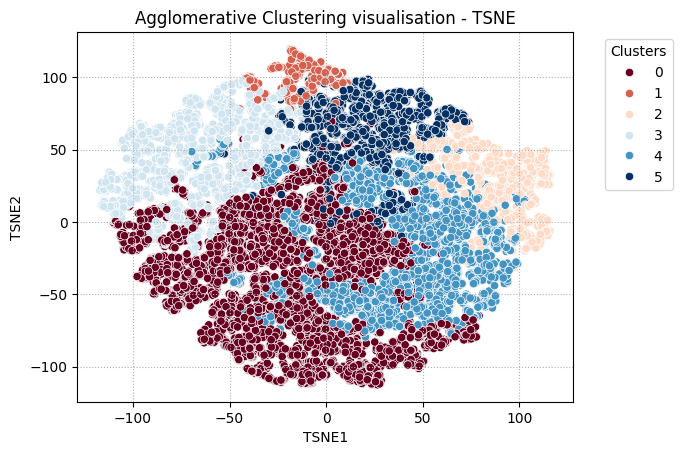

In [50]:
#Performed TSNE on Agglomerative clustering (SAMPLE DATA)

sample_data[['TSNE1','TSNE2']] = tsne_reduce.fit_transform(sample_data[['Customer_Age', 'Frequency', 'Recency', 'CLV', 'Average_Unit_Cost']])

#Visualised the data
plt.title('Agglomerative Clustering visualisation - TSNE')
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Agglomerative_Clusters', data=sample_data, palette='RdBu')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Clusters')
plt.grid(linestyle='dotted')
plt.show()

Both outputs produced similar visuals with the Agglomerative clustering displaying hazier and less defined clusters due to utilising only a sample of the data, while the K-means produced more concentrated clusters with less spread.

In [51]:
# Show Agglomerative clustering data
display(sample_data)

,Customer_Age,Frequency,Recency,CLV,Average_Unit_Cost,Agglomerative_Clusters,PCA1,PCA2,TSNE1,TSNE2
63017,1.000000,-0.769231,0.878543,-0.631131,0.988966,3,-1.291508,1.091337,-14.642493,75.155403
11293,-0.666667,0.076923,2.151822,-0.158463,-0.704155,3,-1.170668,-0.509166,-70.464844,37.267929
45293,0.333333,0.615385,-0.358300,0.671005,0.026741,4,0.768587,-0.321266,46.921394,-45.076591
7538,0.833333,-0.230769,-0.348178,-0.439656,-0.374261,0,-0.587998,-0.535819,-39.561642,-51.065445
47237,-0.666667,1.230769,-0.309717,1.283565,0.138403,2,1.634004,-0.332081,76.050804,-14.929621
...,...,...,...,...,...,...,...,...,...,...
29162,0.000000,-0.615385,0.967611,-0.357376,0.665513,0,-1.029371,0.759595,-28.366451,22.046043
56033,-0.333333,0.384615,0.024291,0.157063,-0.109845,0,0.180581,-0.346341,18.117479,-35.299225
1838,1.000000,-0.153846,0.374494,-0.213522,-0.367503,0,-0.709492,-0.424964,-55.961552,-16.646154
31441,-0.166667,0.076923,-0.317814,0.206520,0.278132,0,0.222832,0.034400,18.763655,1.742428


In [ ]:
# Generated a 3D tSNE visualisation
from mpl_toolkits.mplot3d import Axes3D

# Perform TSNE with 3 components
tsne_reduce_3d = TSNE(n_components=3, perplexity=15, random_state=42)
customer_clusters[['TSNE1_3d', 'TSNE2_3d', 'TSNE3_3d']] = tsne_reduce_3d.fit_transform(data_robust)

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(customer_clusters['TSNE1_3d'], customer_clusters['TSNE2_3d'], customer_clusters['TSNE3_3d'],
                     c=customer_clusters['KMeans_Clusters'], cmap='RdBu', s=20)

ax.set_title('KMeans Clustering visualization - 3D TSNE')
ax.set_xlabel('TSNE1_3d')
ax.set_ylabel('TSNE2_3d')
ax.set_zlabel('TSNE3_3d')

legend = ax.legend(*scatter.legend_elements(), title='Clusters')
plt.colorbar(scatter, ax=ax, label='KMeans_Clusters')
plt.show()

In [54]:
import pickle

# Export KMeans clustering table
customer_clusters.to_csv('customer_KMeans_clusters.csv', index=True)
customer_clusters.to_pickle('customer_KMeans_clusters.pkl')

# Export Agglomerative clustering table
sample_data.to_csv('sample_Aggl_clusters.csv', index=True)
sample_data.to_pickle('sample_Aggl_clusters.pkl')

# Summary & Conclusion


* I began by cleaning and preparing the customer data, converting data types and engineering the key features: Frequency, Recency, and Customer Lifetime Value (CLV).

* After exploring the data, I noticed it being right-skewed with outliers, which were handled using RobustScaler to minimise their impact during clustering. The Elbow and Silhouette methods guided me to the optimal cluster number (k=6) selection for segmenting the customers.

* Following this, I applied Agglomerative and KMeans clustering techniques to predict the customer groups.

* Finally, I visualised the clusters, including reducing dimensions with PCA and TSNE, revealing distinct customer segments and their defining characteristics. The results offer insights that can aid make marketing efforts more efficient.

<br>
<br>

##**Interpretations & business strategy:**


**Cluster 0:** High recency scores, low purchase frequency, low customer value and wide age range would suggest these are inactive or churn-risk customers with little engagement and low monetary value.
- **strategy**: Run a re-engagment campaign or minimise spending costs if ineffective.

**Cluster 1:** Highest CLV and Frequency values and lowest recency indicate these are most likely the core customers of the business.
- **strategy**: Key approach would be utilising retention, loyalty programmes, VIP perks and complementary product offerings.

**Cluster 2:** Recently active, cost sensitive consumers with medium to low engagement.
- **strategy**: Devise promotions or bundle deals to nurture towards higher frequency or larger basket size.

**Cluster 3:** Categorises reliable, moderately active customers with good balance of frequency and value.
- **strategy**: Target this segment with upsell and habit-building strategies.

**Cluster 4:** Is characterised by buyers who make large value purchases infrequently.
- **strategy**: Introduce premium campaigns and personalised reminders to improve frequency.

**Cluster 5:** Is defined by the 2nd largest AUC, and the 3rd highest CLV. Despite lower frequency of engagement, the recency of purchases is an indicator of growth potential.
- **strategy**: Stimulate repeat purchases and introduce onboarding benefits.

<br>

### **Reference**:
SAS, 2024. CUSTOMERS_CLEAN [Data set]. SAS. Last revised on 15 December 2021. [Accessed 20 March 2025].